## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env import TicTacToe #- import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
env=TicTacToe()

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    if state1 not in Q_dict.keys():
        valid_act = valid_actions(state)
        for action in valid_act:
            Q_dict[state1][action]=0

In [5]:
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [6]:
# Printing all the valid actions
valid_actions(env.state)

[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [7]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action



#### Tracking the state-action pairs for checking convergence - write your code here

In [8]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

#Q_dict = {}
#States_track = {}

In [9]:
# Initialise states to be tracked

def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('1-x-x-x-2-x-x-x-x',(7,5)),('x-1-2-x-x-x-x-x-x',(3,3))]  #select some 4 Q-values
                      
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []  
  

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [11]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [12]:
initialise_tracking_states()
States_track

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(6, 5): [], (1, 9): []},
             '1-x-x-x-2-x-x-x-x': {(7, 5): []},
             'x-1-2-x-x-x-x-x-x': {(3, 3): []}})

#### Define hyperparameters  ---write your code here

In [32]:
EPISODES = 3500000
LR = 0.01                   # learning rate
GAMMA = 0.9                 # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000002       # epsilon decay rate
threshold =  10000           # no of episodes after which states_tracked will be saved
policy_threshold = 10000     # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [34]:
import time
start_time = time.time()

for episode in range(EPISODES):
    
    env = TicTacToe() # call the environment
    curr_state = env.state    
    is_terminal = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while is_terminal != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epislon method
        next_state, reward, is_terminal = env.step(curr_state, curr_action) # getting reward
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)


        # Updating rules
        if is_terminal != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')
        print("Episode ",episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 10000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  

        
        
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

Episode  9999
Episode  19999
Episode  29999
Episode  39999
Episode  49999
Episode  59999
Episode  69999
Episode  79999
Episode  89999
Episode  99999
Episode  109999
Episode  119999
Episode  129999
Episode  139999
Episode  149999
Episode  159999
Episode  169999
Episode  179999
Episode  189999
Episode  199999
Episode  209999
Episode  219999
Episode  229999
Episode  239999
Episode  249999
Episode  259999
Episode  269999
Episode  279999
Episode  289999
Episode  299999
Episode  309999
Episode  319999
Episode  329999
Episode  339999
Episode  349999
Episode  359999
Episode  369999
Episode  379999
Episode  389999
Episode  399999
Episode  409999
Episode  419999
Episode  429999
Episode  439999
Episode  449999
Episode  459999
Episode  469999
Episode  479999
Episode  489999
Episode  499999
Episode  509999
Episode  519999
Episode  529999
Episode  539999
Episode  549999
Episode  559999
Episode  569999
Episode  579999
Episode  589999
Episode  599999
Episode  609999
Episode  619999
Episode  629999
Epi

In [39]:
print("elapsed_time is ",elapsed_time)

elapsed_time is  5389.14878153801


#### Check the Q-dictionary

In [35]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2889330927423492,
              (0, 3): -1.3111741373173065,
              (0, 5): -1.3093602810811162,
              (0, 7): -1.3117883660998626,
              (0, 9): -1.3102688738479655,
              (1, 1): -1.3096162667964018,
              (1, 3): -1.312246905923905,
              (1, 5): -1.308087667822954,
              (1, 7): -1.3096566997706653,
              (1, 9): -1.3130281831651318,
              (2, 1): -1.306831121712363,
              (2, 3): -1.3138659376142776,
              (2, 5): -1.3146942513669482,
              (2, 7): -1.3144739354181443,
              (2, 9): -1.308474239509661,
              (3, 1): -1.3161709603350829,
              (3, 3): -1.3065239750682087,
              (3, 5): -1.3149745576773006,
              (3, 7): 5.310702763672727,
              (3, 9): -1.3107573451718615,
              (4, 1): -1.3089204334354692,
              (4, 3): -1.317287326125125,
              (4, 5): 

In [36]:
len(Q_dict)

1867201

In [66]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
random_state = np.random.choice(list(Q_dict.keys()))
print("random_state : ",random_state)                                
Q_dict[random_state]

random_state :  1-x-7-x-4-x-8-x-x


{(1, 3): -0.01,
 (1, 5): -0.01,
 (1, 9): -0.01,
 (3, 3): -0.01,
 (3, 5): 0,
 (3, 9): 0,
 (5, 3): 0,
 (5, 5): 0,
 (5, 9): 0,
 (7, 3): -0.01,
 (7, 5): 0,
 (7, 9): -0.01,
 (8, 3): 0,
 (8, 5): -0.01,
 (8, 9): 0}

In [68]:
len(Q_dict[random_state])

15

In [67]:
max(Q_dict[random_state],key=Q_dict[random_state].get)

(3, 5)

For state (1-x-7-x-4-x-8-x-x) there are total 15 possible choices out which (3,5) is best action

#### Check the states tracked for Q-values convergence
(non-evaluative)

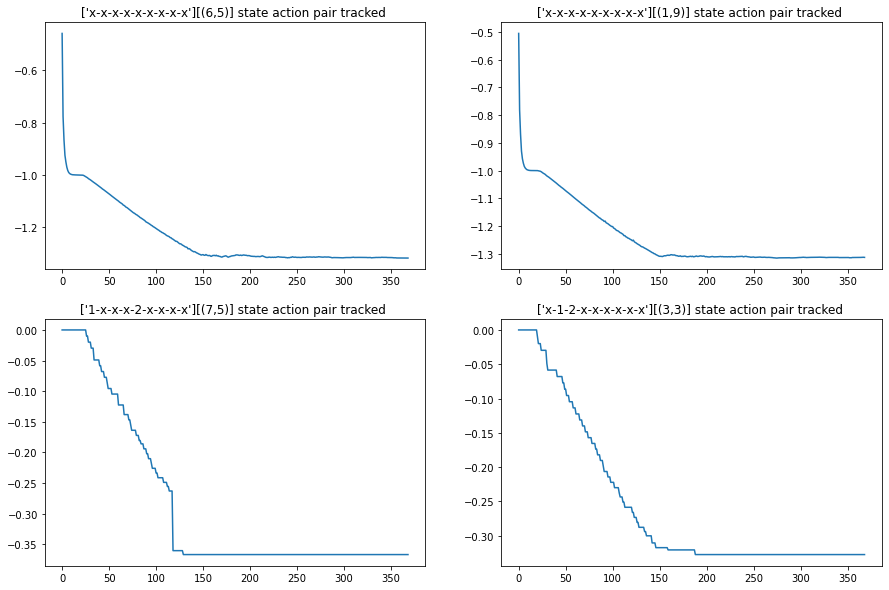

In [41]:
# Write the code for plotting the graphs for state-action pairs tracked

plt.figure(0, figsize=(15,10))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.title("['x-x-x-x-x-x-x-x-x'][(6,5)] state action pair tracked ")
#plt.show()

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.title("['x-x-x-x-x-x-x-x-x'][(1,9)] state action pair tracked ")
#plt.show()


x_axis = np.asarray(range(0, len(States_track['1-x-x-x-2-x-x-x-x'][(7,5)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['1-x-x-x-2-x-x-x-x'][(7,5)]))
plt.title("['1-x-x-x-2-x-x-x-x'][(7,5)] state action pair tracked ")
#plt.show()

x_axis = np.asarray(range(0, len(States_track['x-1-2-x-x-x-x-x-x'][(3,3)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-1-2-x-x-x-x-x-x'][(3,3)]))
plt.title("['x-1-2-x-x-x-x-x-x'][(3,3)] state action pair tracked ")
plt.show()


### Epsilon - decay check

In [69]:
max_epsilon = 1.0    ## greedy 100%
min_epsilon = 0.001  ## min_epsilon= 0.1%
time = np.arange(0,3500000)
epsilon = []
for i in range(0,3500000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000002*i))

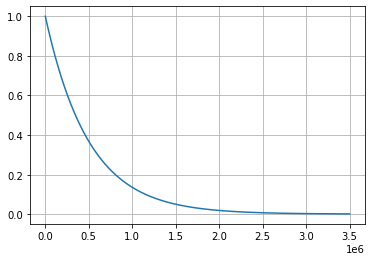

In [70]:
plt.plot(time, epsilon)
plt.grid(True)
plt.show()